# Prediction of Heat in district heating system using different Machine Learning algorithms and checking their accuracy:


## Step 1: Importing necessary files for model prediction


In [215]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import sklearn.model_selection as ms
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

## Step 2: Upload dataset as csv file

In [164]:
Data = pd.read_csv("C:/Users/Lenovo/Desktop/HeatAlgorithms/Machine Learning Algorithms/Dataset.csv")

In [165]:
print(Data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


## Step 3:Pre - processing of the data:

In [166]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Here, each column represents the data as follows:
<table align="left">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>X1</td>
      <td>Relative Compactness</td>
    </tr>
    <tr>
      <td>X2</td>
      <td>Surface Area</td>
    </tr>
    <tr>
      <td>X3</td>
      <td>Wall Area</td>
    </tr>
    <tr>
      <td>X4</td>
      <td>Roof Area</td>
    </tr>
    <tr>
      <td>X5</td>
      <td>Overall Height</td>
    </tr>
    <tr>
      <td>X6</td>
      <td>Orientation</td>
    </tr>
    <tr>
      <td>X7</td>
      <td>Glazing Area</td>
    </tr>
    <tr>
      <td>X8</td>
      <td>Glazing Area Distribution</td>
    </tr>
    <tr>
      <td>Y1</td>
      <td>Heating Load</td>
    </tr>
    <tr>
      <td>Y2</td>
      <td>Cooling Load</td>
    </tr>
  </tbody>
</table>



### Since, Y2 is related to cooling load and for this project only heating load is required so we can drop column Y2 for the prediction of heat.

In [167]:
Data = Data.drop(['Y2'], axis = 1)

## Data Visualization:

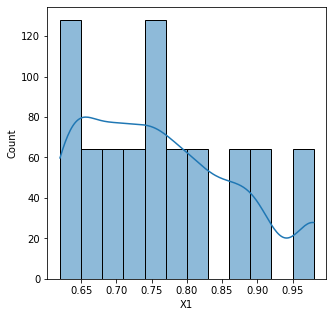

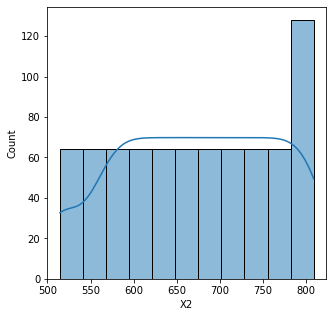

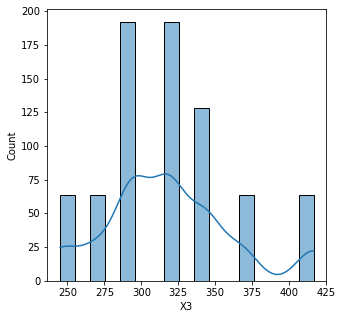

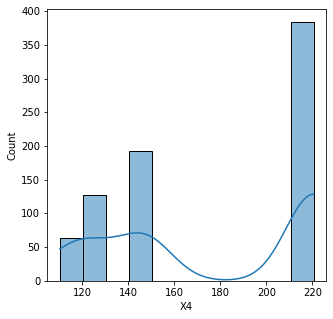

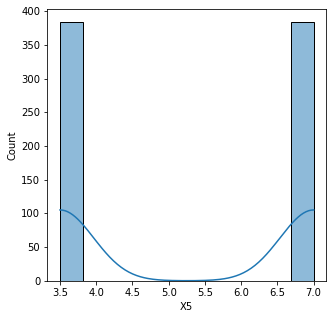

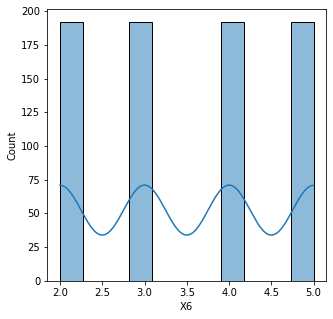

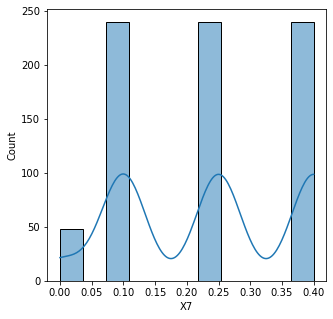

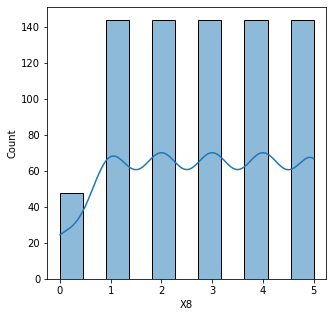

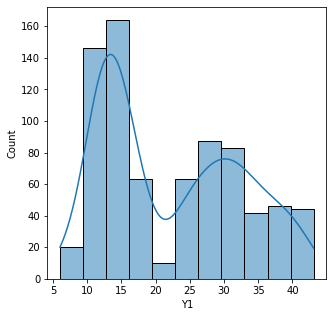

In [168]:
for i in Data.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(data= Data[i], kde= True, multiple='stack')
    plt.show()

In [169]:
Data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000


<AxesSubplot:>

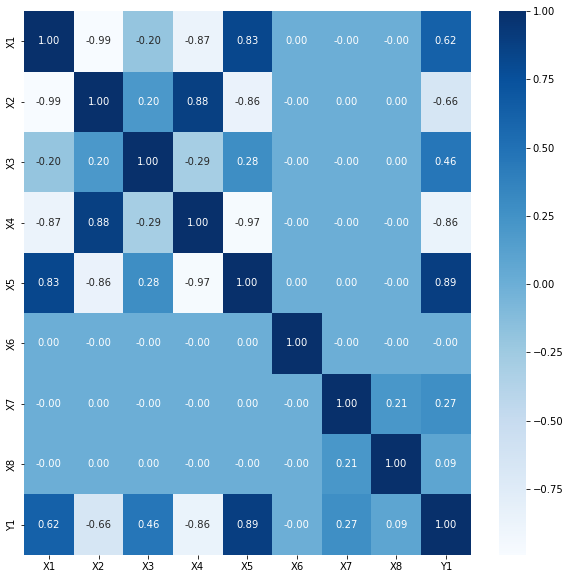

In [170]:
plt.figure(figsize = (10,10))
sns.heatmap(Data.corr(), annot = True, fmt = '.2f',cmap = 'Blues')

## Step 4: Train Test Splitting of the data

In [171]:

X_train, X_test, Y_train, Y_test = train_test_split(Data[['X1','X2','X3','X4','X5','X6','X7','X8']], Data.Y1,test_size = 0.3, random_state = 0)

In [172]:
X_train

,X1,X2,X3,X4,X5,X6,X7,X8
580,0.90,563.5,318.5,122.50,7.0,2,0.40,2
418,0.69,735.0,294.0,220.50,3.5,4,0.25,3
764,0.62,808.5,367.5,220.50,3.5,2,0.40,5
363,0.74,686.0,245.0,220.50,3.5,5,0.25,2
757,0.66,759.5,318.5,220.50,3.5,3,0.40,5
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.40,5
192,0.98,514.5,294.0,110.25,7.0,2,0.10,4
629,0.90,563.5,318.5,122.50,7.0,3,0.40,3
559,0.71,710.5,269.5,220.50,3.5,5,0.40,1


In [173]:
X_test

,X1,X2,X3,X4,X5,X6,X7,X8
661,0.66,759.5,318.5,220.50,3.5,3,0.40,3
122,0.74,686.0,245.0,220.50,3.5,4,0.10,2
113,0.79,637.0,343.0,147.00,7.0,3,0.10,2
14,0.82,612.5,318.5,147.00,7.0,4,0.00,0
529,0.98,514.5,294.0,110.25,7.0,3,0.40,1
...,...,...,...,...,...,...,...,...
165,0.76,661.5,416.5,122.50,7.0,3,0.10,3
188,0.62,808.5,367.5,220.50,3.5,2,0.10,3
334,0.62,808.5,367.5,220.50,3.5,4,0.25,1
758,0.66,759.5,318.5,220.50,3.5,4,0.40,5


In [174]:
Y_train

580    35.84
418    12.31
764    16.54
363    12.30
757    14.92
       ...  
763    17.88
192    24.38
629    34.95
559    14.58
684    28.93
Name: Y1, Length: 537, dtype: float64

In [175]:
Y_test

661    15.18
122    10.32
113    37.26
14     16.95
529    32.26
       ...  
165    33.28
188    12.68
334    15.08
758    14.92
34      6.77
Name: Y1, Length: 231, dtype: float64

## Step 6: Applying Models

## Model 1: Linear Regression

In [209]:
LR =lm.LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [211]:
results = ms.cross_val_score(LR, X_train,Y_train, cv=5)
print ("Model Score=", results.mean())

Model Score= 0.913094407928359


In [178]:
Y_Pred1 = model.predict(X_test)
print(Y_Pred1)

[17.982028    8.29763184 29.96286188 26.23105497 31.16860919 27.72047172
 28.3776539  34.46853115 29.4351857  29.00401072  7.31582493 35.54741411
 12.45881248 35.78483607 36.32101672 26.76162056  9.79266364 27.54174484
 16.50737762 12.64231402 13.6960409  31.34733607  9.96874888 32.93254405
  5.94082493 15.55330112 13.59639052 14.77317684  9.43520988 33.4687247
 13.89250756 15.01234582 36.02225803 14.83361894 28.61507586 37.61127093
 14.41572308 37.9687247  18.88218408 10.36691017 12.1600538  32.8151539
 16.13218408 31.5601857  24.22344512 25.70408876 10.15011741 13.57865074
 28.13662056 32.52489968 31.288641   13.29763184 34.70292548 18.39817684
 37.78999782  8.06020988 23.22725005 31.20273194 33.11391258 16.7270598
 17.92333292 12.70100909 31.46736788  8.83381248 12.46358714 11.50473598
 32.75645882 11.20120264 26.94034744 32.9351857  31.58475803 10.0300856
 29.12404252 19.11960604 12.84639052 31.38145882 31.76348492 33.29263946
 31.9422118  15.43326931 33.54244592 27.95789368 11.802

In [212]:
Error = Y_test -Y_Pred1
print(Error)

661   -2.802028
122    2.022368
113    7.297138
14    -9.281055
529    1.091391
         ...   
165   -1.361589
188   -0.913749
334   -0.949892
758   -3.360787
34    -1.479520
Name: Y1, Length: 231, dtype: float64


In [213]:
mae = mean_absolute_error (Y_test, Y_Pred1)
mse = mean_squared_error (Y_test, Y_Pred1)
r_score = r2_score (Y_test, Y_Pred1)
print (mae)
print (mse)
print (r_score)

2.240576183953205
9.374201004552718
0.9108295636459294


In [214]:
LR.score(X_test , Y_test)

0.9108295636459294

## Model 2: Ridge Regression Model

In [181]:
model_ridge = lm.Ridge(alpha = 10)

model_ridge = model_ridge.fit(X_train, Y_train)

In [182]:
Y_Pred2 = model_ridge.predict(X_test)

In [ ]:
results = ms.cross_val_score(model, X_train,Y_train, cv=5)
print ("Model Score=", results.mean())

In [183]:
Error = Y_test -Y_Pred2
print(Error)

661    -0.505778
122     1.690534
113     6.990458
14    -10.296871
529     1.979749
         ...    
165    -1.421882
188    -2.856554
334    -0.995942
758    -1.512991
34     -2.744581
Name: Y1, Length: 231, dtype: float64


In [202]:
mae = mean_absolute_error (Y_test, Y_Pred2)
mse = mean_squared_error (Y_test, Y_Pred2)
r_score = r2_score (Y_test, Y_Pred2)
print (mae)
print (mse)
print (r_score)

2.654762164336859
12.675985699260114
0.879421918148328


## Model 3: Random Forest Regressor

In [184]:
RFR = RandomForestRegressor(random_state=0)
RFR = RFR.fit(X_train, Y_train)

RFR_score = RFR.score(X_train, Y_train)
print(RFR_score)

0.9996016313636952


In [185]:
Y_Pred3 = RFR.predict(X_test)

In [186]:
Error = Y_test -Y_Pred3
print(Error)

661   -0.0408
122   -0.0945
113    1.3020
14    -0.5105
529   -0.1900
        ...  
165    0.8309
188   -0.0046
334   -0.0130
758   -0.0402
34     0.0141
Name: Y1, Length: 231, dtype: float64


In [203]:
mae = mean_absolute_error (Y_test, Y_Pred3)
mse = mean_squared_error (Y_test, Y_Pred3)
r_score = r2_score (Y_test, Y_Pred3)
print (mae)
print (mse)
print (r_score)

0.34988701298701197
0.30415210930735703
0.997106806618316


## Model 4: Support Vector Regressor

In [187]:
SVR = SVR(kernel = 'linear')
SVR = SVR.fit(X_train, Y_train)

In [188]:
Y_Pred4 = SVR.predict(X_test)

In [189]:
Error = Y_test -Y_Pred4
print(Error)

661   -0.817790
122    2.147201
113    7.646122
14    -9.840754
529    0.320745
         ...   
165   -2.426160
188   -3.073559
334   -2.038472
758   -1.353831
34    -3.049745
Name: Y1, Length: 231, dtype: float64


In [204]:
mae = mean_absolute_error (Y_test, Y_Pred4)
mse = mean_squared_error (Y_test, Y_Pred4)
r_score = r2_score (Y_test, Y_Pred4)
print (mae)
print (mse)
print (r_score)

2.7586499579218167
13.766648400863552
0.8690471812539672


## Model 5: Lasso Regression Model

In [192]:
model_lasso = lm.Lasso(alpha = 10)

model_lasso = model_lasso.fit(X_train, Y_train)

In [195]:
Y_Pred5 = model_lasso.predict(X_test)

In [196]:
Error = Y_test -Y_Pred5
print(Error)

661     0.532525
122    -0.956053
113     8.505153
14    -10.681039
529    -0.739014
         ...    
165    -3.174123
188    -4.215089
334    -1.815089
758     0.272525
34     -6.753668
Name: Y1, Length: 231, dtype: float64


In [205]:
mae = mean_absolute_error (Y_test, Y_Pred5)
mse = mean_squared_error (Y_test, Y_Pred5)
r_score = r2_score (Y_test, Y_Pred5)
print (mae)
print (mse)
print (r_score)

3.576137016267189
25.791876661643833
0.7546593149440488


## Model 6: Arificial Nueral Network (ANN)

### Normalizing the data for ANN model

In [190]:
sx = preprocessing.Normalizer()
sy = preprocessing.Normalizer()

scaled_X_train = sx.fit_transform(X_train)
scaled_X_test = sx.fit_transform(X_test)
scaled_Y_train = sx.fit_transform(Y_train.values.reshape(X_train.shape[0],1))
scaled_Y_test = sx.fit_transform(Y_test.values.reshape(X_test.shape[0],1))

In [191]:
model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(8,), activation = 'linear'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4, activation = 'linear'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation = 'linear')
    
    
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(scaled_X_train,scaled_Y_train,epochs = 20)

Epoch 1/20
17/17 [==============================] - 6s 8ms/step - loss: 0.7110 - accuracy: 0.0317
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3697 - accuracy: 0.3464
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.1997 - accuracy: 0.6946
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.1023 - accuracy: 0.8622
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9013
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0655 - accuracy: 0.9330
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.9385
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9646
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0572 - accuracy: 0.9423
Epoch 10/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9385
Epoch 11/20
17/17 [